In [1]:
#Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Reading csv file of dataset
 
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,Looking for adventurous people to join a thriv...,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,0,0,0,Contract,Associate,NaN,Automotive,Sales,1
1,2,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"A Newly established company seeks outgoing, fr...","Must have good knowledge of Outlook, Microsoft...",NaN,0,0,0,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,1
2,3,Technology Consultant - Outside Sales,"US, OH,",NaN,NaN,NaN,Apply below using link#URL_00962c0bdac3ecf40b2...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Information Technology and Services,NaN,1
3,4,Senior Engineering Product Manager,"US, CA, San Jose",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product ManagerAs a member ...,Skills and Requirements MSEE with 5 years of e...,"What is offered:Broad responsibility, autonomy...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,1
4,5,Quality Improvement Manager,"US, FL,",NaN,NaN,NaN,Apply using below link#URL_8b28dea5804b323e29d...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,NaN,1


In [3]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [4]:
##Info about the data shape of data, type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               3083 non-null   int64 
 1   title                3083 non-null   object
 2   location             3032 non-null   object
 3   department           2206 non-null   object
 4   salary_range         2446 non-null   object
 5   company_profile      2174 non-null   object
 6   description          850 non-null    object
 7   requirements         701 non-null    object
 8   benefits             494 non-null    object
 9   telecommuting        3083 non-null   int64 
 10  has_company_logo     3083 non-null   int64 
 11  has_questions        3083 non-null   int64 
 12  employment_type      2790 non-null   object
 13  required_experience  1770 non-null   object
 14  required_education   1621 non-null   object
 15  industry             1675 non-null   object
 16  functi

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,1542.000000,0.049303,0.666559,0.450211,0.277652
std,890.129766,0.216534,0.471519,0.497596,0.447913
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,771.500000,0.000000,0.000000,0.000000,0.000000
50%,1542.000000,0.000000,1.000000,0.000000,0.000000
75%,2312.500000,0.000000,1.000000,1.000000,1.000000
max,3083.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(3083, 18)

In [7]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

#### Check for missing values and outlier

In [8]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,3083.0,3083.0,3032,2206,2446,2174,850,701,494,3083.0,3083.0,3083.0,2790,1770,1621,1675,1539,3083.0
True,NaN,NaN,51,877,637,909,2233,2382,2589,NaN,NaN,NaN,293,1313,1462,1408,1544,NaN


In [9]:
#Check for number of null values
df.isnull().sum()

job_id                    0
title                     0
location                 51
department              877
salary_range            637
company_profile         909
description            2233
requirements           2382
benefits               2589
telecommuting             0
has_company_logo          0
has_questions             0
employment_type         293
required_experience    1313
required_education     1462
industry               1408
function               1544
fraudulent                0
dtype: int64

In [10]:
#Check if any duplicate rows in dataset
if df.duplicated().sum() > 0 :
     #drop the duplicate values
     df.drop_duplicates(inplace=True)
else:
    print("No duplicated data.")

No duplicated data.


In [11]:
#Differentiate categorical data and numerical data
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

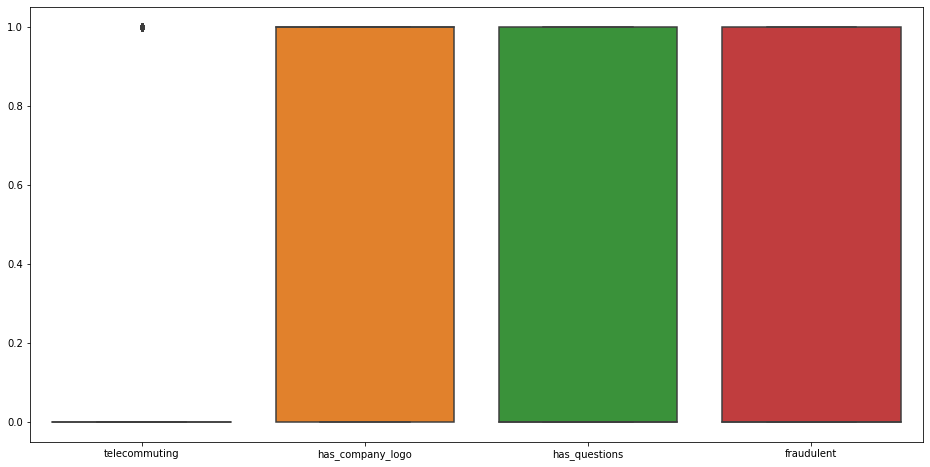

In [12]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sb.boxplot(data = df_num)
plt.show()

#### Columns 'telecommuting', 'has_company_logo' ,'fradulent' has minimal outliers.

In [13]:
#Removing Outliers from columns
df_num = df_num[df_num['telecommuting'] < 0.9 ]
#df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
3,0,1,1,1,NaN
5,0,1,0,1,NaN
6,0,1,1,1,NaN
7,0,1,1,1,65000-75000
8,0,1,1,1,NaN
...,...,...,...,...,...
3078,0,1,1,0,180000-240000
3079,0,1,1,0,16000-18000
3080,0,1,1,0,30000-37000
3081,0,1,1,0,37000-41600


In [14]:
df.isnull().sum()

job_id                    0
title                     0
location                 51
department              877
salary_range            637
company_profile         909
description            2233
requirements           2382
benefits               2589
telecommuting             0
has_company_logo          0
has_questions             0
employment_type         293
required_experience    1313
required_education     1462
industry               1408
function               1544
fraudulent                0
dtype: int64

In [15]:
#df.dropna(axis= 0, how= 'any', inplace=True)

In [16]:
df.isnull().sum()

job_id                    0
title                     0
location                 51
department              877
salary_range            637
company_profile         909
description            2233
requirements           2382
benefits               2589
telecommuting             0
has_company_logo          0
has_questions             0
employment_type         293
required_experience    1313
required_education     1462
industry               1408
function               1544
fraudulent                0
dtype: int64

In [17]:
df.shape

(3083, 18)

#### Outliers and missing values has been removed.

### Creating Visual methods to analyze data

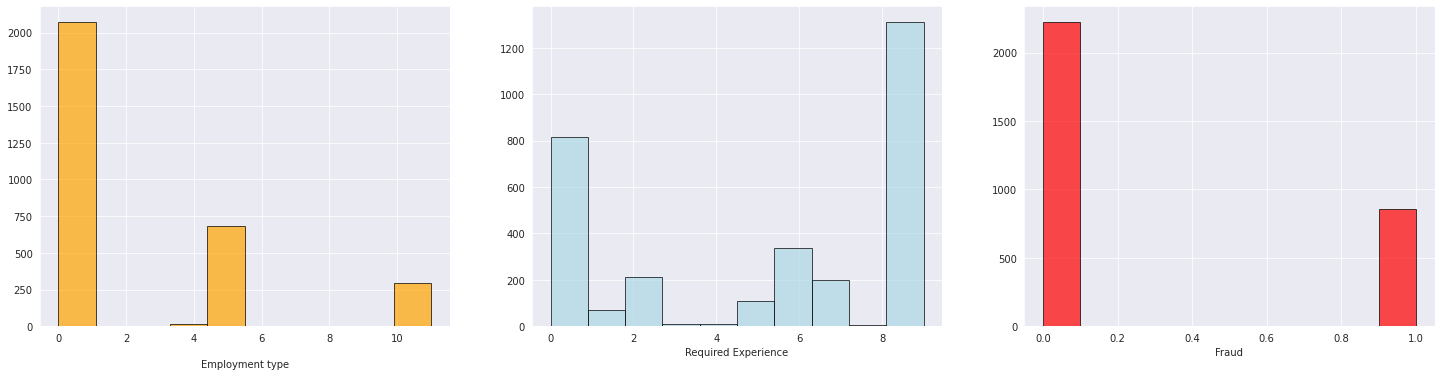

In [63]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
plt.hist(df.employment_type, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nEmployment type')

plt.subplot(3,3,2)
plt.hist(df.required_experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Required Experience')

plt.subplot(3,3,3)
plt.hist(df.fraudulent, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Fraud')


plt.show()

#### Full-time jobs are posted more comparatively to other type of employment.

#### There are more jobs available that requires Mid-senior level Experience.

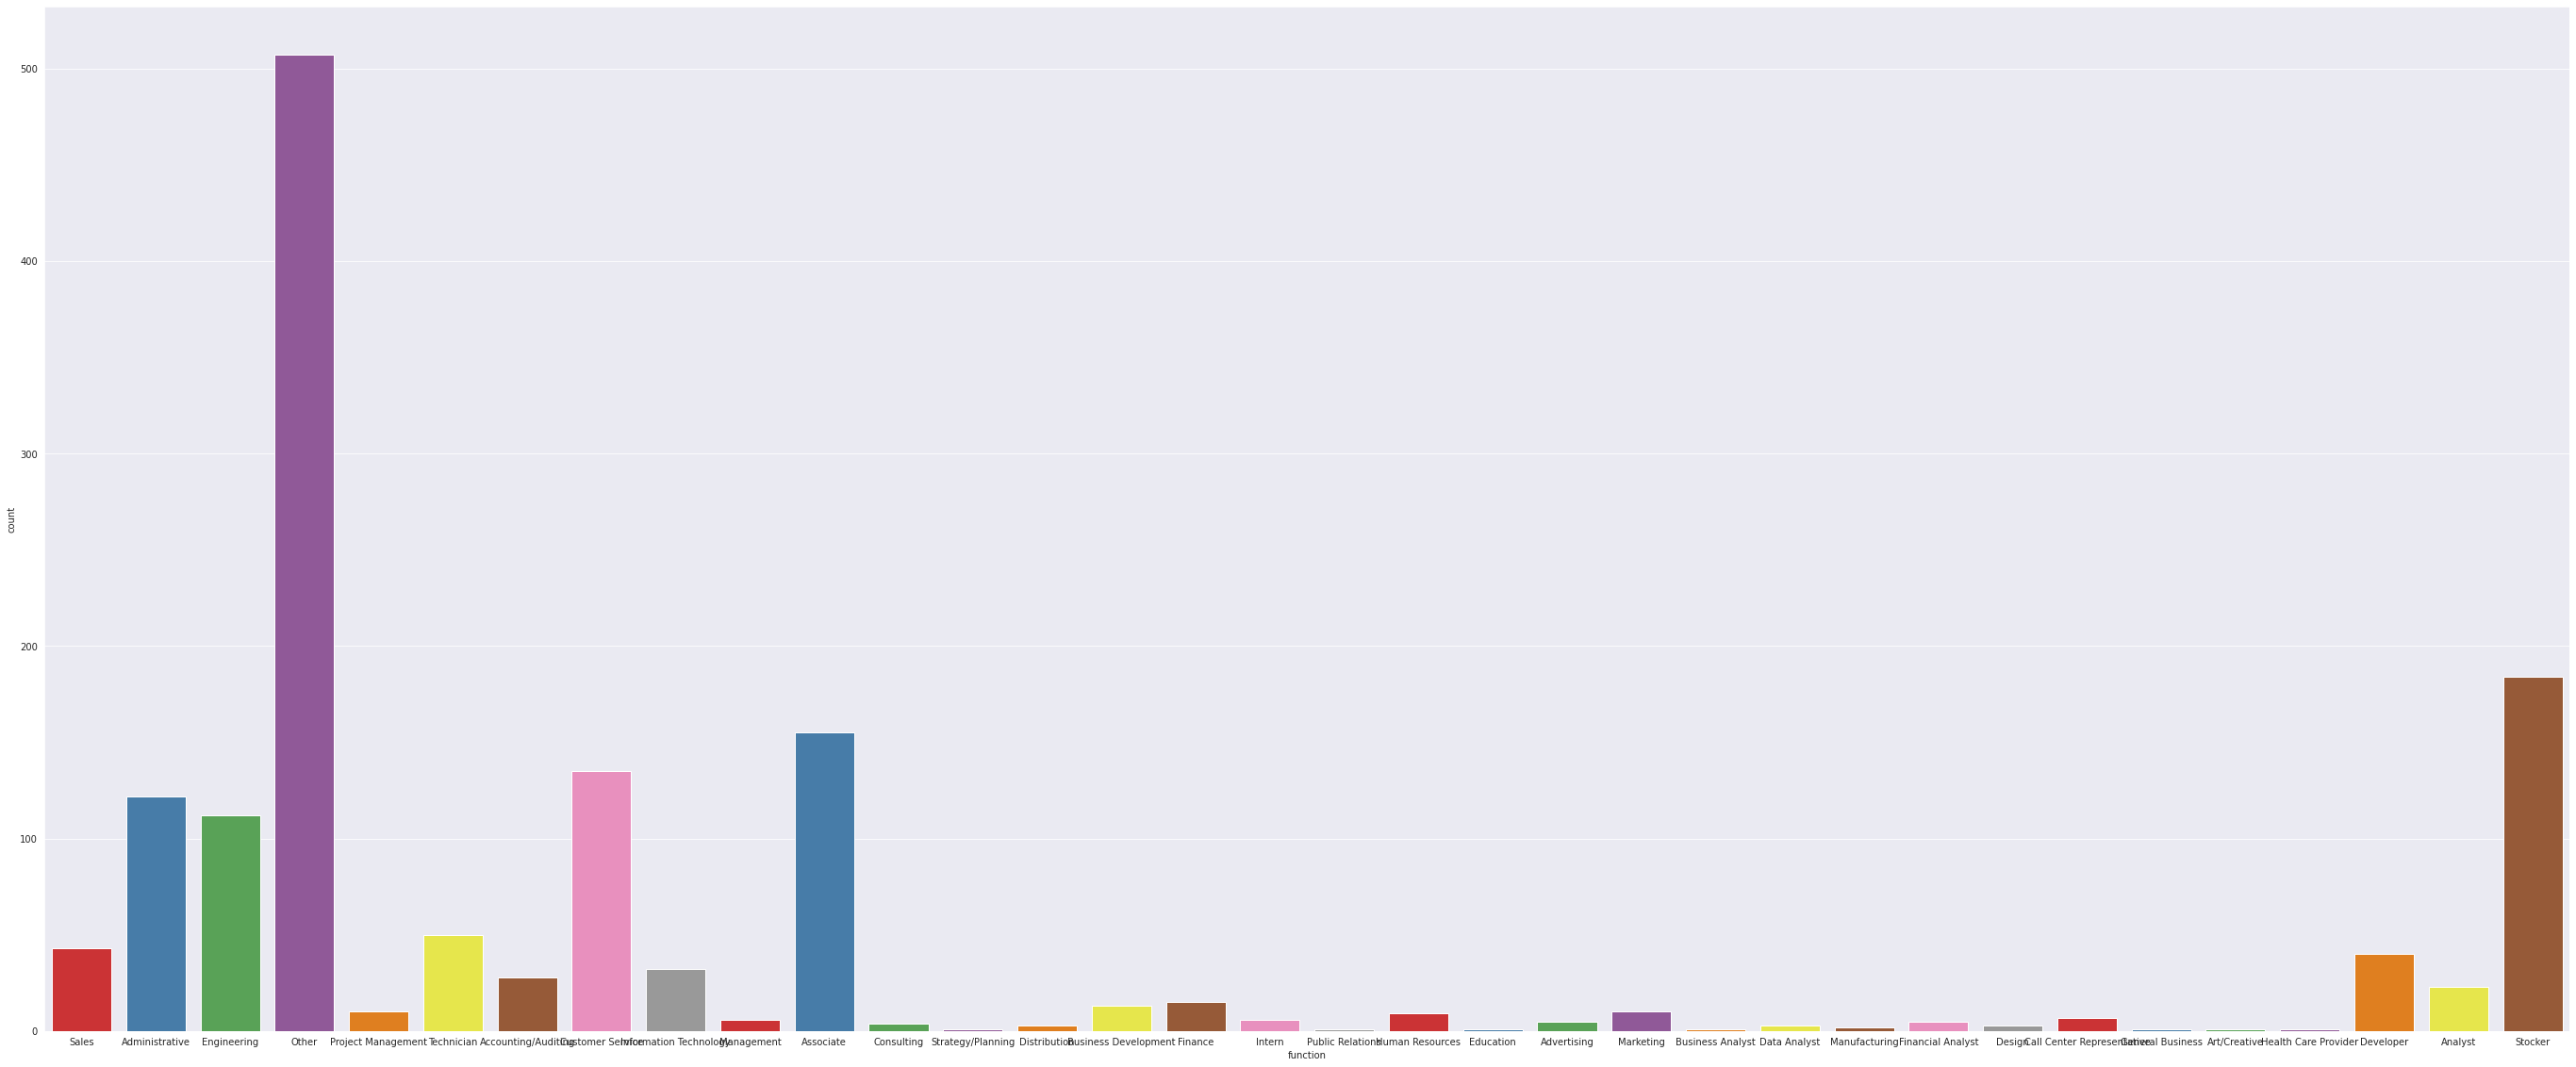

In [24]:
plt.figure(figsize=(48,20))
sb.set_style("darkgrid")
sb.countplot(x='function',data=df,palette='Set1')

### There are maximum number of jobs are posted in IT field and minimum jobs are posted related to Distribution.

### Jobs in Other,Associate,Engineering,Stocker are most in demand jobs.

#### Que 1: Which is the job titles have most full time job opportunities and how many?

In [25]:
#Subsetting dataframe which have 'Full-time' employment type and also are not fruad.
df_jobs = df[(df['employment_type'] == 'Full-time') & (df['fraudulent']== 0)]

In [26]:
df_jobs.shape

(1524, 18)

In [27]:
#Checking the counts of each unique value
df_jobs['title'].value_counts()

Network/Structured Cabling Technician                                        30
WAREHOUSE LEAD HAND                                                          28
Business Analyst                                                             24
Overnight Associate  (Duncan)                                                20
Executive Director                                                           20
                                                                             ..
310t Refer Mechanic (Mobile) - up to $20,000 signing incentives               1
Service Planner - London, ON                                                  1
Registered Practical Nursers, Personal Support Workers, Registered Nurses     1
Sawmill workers                                                               1
Outside Sales Representative (door to door)                                   1
Name: title, Length: 310, dtype: int64

In [28]:
df_jobs['title'].value_counts().max()

30

Ans 1 : Job title 'Network/Structured Cabling Technician' has 30 opportunities for a full time job.

In [29]:
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,Looking for adventurous people to join a thriv...,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,0,0,0,Contract,Associate,NaN,Automotive,Sales,1
1,2,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"A Newly established company seeks outgoing, fr...","Must have good knowledge of Outlook, Microsoft...",NaN,0,0,0,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,1
2,3,Technology Consultant - Outside Sales,"US, OH,",NaN,NaN,NaN,Apply below using link#URL_00962c0bdac3ecf40b2...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Information Technology and Services,NaN,1
3,4,Senior Engineering Product Manager,"US, CA, San Jose",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product ManagerAs a member ...,Skills and Requirements MSEE with 5 years of e...,"What is offered:Broad responsibility, autonomy...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,1
4,5,Quality Improvement Manager,"US, FL,",NaN,NaN,NaN,Apply using below link#URL_8b28dea5804b323e29d...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,NaN,1
5,6,Lead Mechanical Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes€¢ Mec...,We offer€¢ Friendly colleagues in an industry ...,0,1,0,Full-time,NaN,NaN,Oil & Energy,Engineering,1
6,7,Director of Strategy,"US, CA, San Mateo",Engineering,NaN,Bright Edge and Aptitude Staffing Solutions ha...,"Director of Strategy | San Mateo, CA Intereste...",Requirements:Previous experience at a top-tier...,NaN,0,1,1,Full-time,Director,Bachelor's Degree,Information Technology and Services,Engineering,1
7,8,UST Testing Technician II,"US, CA, Bakersfield",Oil & Energy,65000-75000,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1
8,9,Director of Strategy,"US, CA, San Mateo",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,"Director of Strategy | San Mateo, CA Intereste...",Requirements:Previous experience at a top-tier...,NaN,0,1,1,Full-time,Director,Bachelor's Degree,Information Technology and Services,Engineering,1
9,10,Health + Safety Professional,"US, CA, Bakersfield",HSE (Health Safety Environmental),80000-120000,Staffing &amp; Recruiting done right for the O...,Health &amp; Safety Professional | Bakersfield...,Duties and Responsibilities:Provides safety po...,What is offered:Competitive compensation packa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1


#### Que 2 : Which industry have the maximum number of fake job postings?

In [30]:
#Only including rows which are fake job postings.
df_industry = df[df['fraudulent']== 1]

In [31]:
df_industry.shape

(856, 18)

In [32]:
#Checking each unique value counts of industry.
df_industry['industry'].value_counts()

Oil & Energy                 107
Accounting                    57
Hospital & Health Care        51
Marketing and Advertising     45
Financial Services            35
                            ... 
Civil Engineering              1
Cosmetics                      1
Medical Devices                1
Public Safety                  1
Online Media                   1
Name: industry, Length: 67, dtype: int64

#### Ans 2 : Industry with, maximum no. of fake job postings : Oil & energy

#### Balancing dataset¶
We have performed Explorartory Data Analysis on dataset,now we need to check if our dataset is balanced or not.
Unbalanced dataset can lead to biased results for our model.

In [33]:
df['fraudulent'].value_counts()

0    2227
1     856
Name: fraudulent, dtype: int64

- -> Separete fraudulent and non fraudulent dataframes:

In [34]:
df['fraudulent'].values

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(856, 18)

In [36]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(2227, 18)

In [40]:
df = fraud.append(not_fraud)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,Looking for adventurous people to join a thriv...,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,0,0,0,Contract,Associate,NaN,Automotive,Sales,1
1,1,2,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"A Newly established company seeks outgoing, fr...","Must have good knowledge of Outlook, Microsoft...",NaN,0,0,0,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,1
2,2,3,Technology Consultant - Outside Sales,"US, OH,",NaN,NaN,NaN,Apply below using link#URL_00962c0bdac3ecf40b2...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Information Technology and Services,NaN,1
3,3,4,Senior Engineering Product Manager,"US, CA, San Jose",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product ManagerAs a member ...,Skills and Requirements MSEE with 5 years of e...,"What is offered:Broad responsibility, autonomy...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,1
4,4,5,Quality Improvement Manager,"US, FL,",NaN,NaN,NaN,Apply using below link#URL_8b28dea5804b323e29d...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,3078,3079,Overnight Stocking Associate Part Time,"Richmond Hill, ON L4S0B2",Retail,180000-240000,"This is an overnight role, which requires avai...",NaN,NaN,NaN,0,1,1,Part-time,Associate,High School or equivalent,Retail,Other,0
3079,3079,3080,Network/Structured Cabling Technician,"Winnipeg, MB",NaN,16000-18000,We are looking for Network Cabling Specialists...,NaN,NaN,NaN,0,1,1,Full-time,Associate,Some College Coursework Completed,NaN,Technician,0
3080,3080,3081,Overnight Freight Team Associate Part Time,"Mississauga, ON L5V3E4",Retail,30000-37000,"This is an overnight role, which requires avai...",NaN,NaN,NaN,0,1,1,Part-time,Associate,High School or equivalent,Retail,Other,0
3081,3081,3082,Overnight Stocker,"Ancaster, ON L9K1J9",Retail,37000-41600,"This is an overnight role, which requires avai...",NaN,NaN,NaN,0,1,1,Part-time,Not Applicable,High School or equivalent,Retail,Stocker,0


We have so much categorical data, so we need to convert it to numerical data.
To do so, we perform LabelEncoding.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
df['location'] = df['location'].astype(str)
df['company_profile'] = df['company_profile'].astype(str)
df['requirements'] = df['requirements'].astype(str)
df['employment_type'] = df['employment_type'].astype(str)
df['required_experience'] = df['required_experience'].astype(str)
df['required_education'] = df['required_education'].astype(str)
df['industry'] = df['industry'].astype(str)
df['function'] = df['function'].astype(str)
df['salary_range'] = df['salary_range'].astype(str)

In [43]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

In [44]:
df = df.reset_index()
df.head()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,340,414,hr,438,132,If you have experience in financing for auto s...,439,profit sharingcar allowancecompany car,0,0,0,0,0,10,4,30,1
1,1,2,51,340,NaN,295,274,"A Newly established company seeks outgoing, fr...",194,NaN,0,0,0,1,2,4,16,1,1
2,2,3,842,552,NaN,742,274,Apply below using link#URL_00962c0bdac3ecf40b2...,436,NaN,0,0,0,1,9,10,36,34,1
3,3,4,756,348,Engineering,742,16,Senior Engineering Product ManagerAs a member ...,361,"What is offered:Broad responsibility, autonomy...",0,1,1,1,5,1,15,16,1
4,4,5,671,371,NaN,742,274,Apply using below link#URL_8b28dea5804b323e29d...,436,NaN,0,0,0,1,9,10,32,34,1


Split dataset into training and testing¶

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'salary_range']].values
Y = df[['fraudulent']].values

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [48]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2312, 14), (771, 14), (2312, 1), (771, 1))

Now we will apply 3 different classification algorithms to gain maximum possible accuracy score which are:

1) Logistic Regression
2) K Nearest Neighbours
3) Random Forest
For training these models,

Independent variable : X
Dependent variable : Y (Check if posted job is fake or not)

##### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
LgR = LogisticRegression()

In [51]:
LgR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
Y_pred = LgR.predict(X_test)

In [53]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [54]:
Y_test.shape, Y_pred.shape

((771,), (771,))

In [55]:
df_lgr = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_lgr

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
766,0,0
767,1,1
768,0,0
769,1,1


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
lr_accuracy =accuracy_score(Y_pred, Y_test)
lr_accuracy

0.9896238651102465

-----------------Logistic Regression Report---------------
F1 score: 0.9896380315046058
Accuracy score: 0.9896238651102465
Confusion matrix: 
 [[547   5]
 [  3 216]]


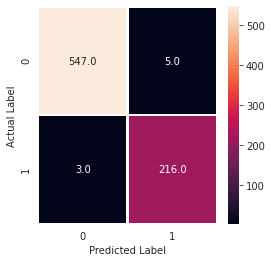

In [58]:
##Logistic Regression report and analysis
from sklearn import metrics
lr_f1 = metrics.f1_score(Y_test,Y_pred ,average= "weighted")
lr_accuracy = metrics.accuracy_score(Y_test, Y_pred)
lr_cm = metrics.confusion_matrix(Y_test, Y_pred)
print("-----------------Logistic Regression Report---------------")
print("F1 score: {}".format(lr_f1))
print("Accuracy score: {}".format(lr_accuracy))
print("Confusion matrix: \n", lr_cm)

import seaborn as sns
plt.subplots(figsize=(4,4))
conf_matrix =  metrics.confusion_matrix(y_pred=Y_pred,y_true=Y_test)
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Acuracy with logistic regression is 98%






##### K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

ipykernel_launcher:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier()

In [ ]:
Y_pred = knn.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_knn = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_knn

,Y_test,Y_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
766,1,1
767,0,0
768,0,0
769,0,0


In [ ]:
# Accuracy of the model
knn_accuracy= accuracy_score(Y_pred,Y_test)
knn_accuracy

0.993514915693904

Accuracy with knn is 99%

-----------------KNN Report---------------
F1 score: 0.9935009805797559
Accuracy score: 0.993514915693904
Confusion matrix: 
 [[554   1]
 [  4 212]]


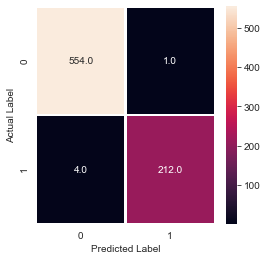

In [ ]:
##KNN report and analysis
from sklearn import metrics
knn_f1 = metrics.f1_score(Y_test,Y_pred ,average= "weighted")
knn_accuracy = metrics.accuracy_score(Y_test, Y_pred)
knn_cm = metrics.confusion_matrix(Y_test, Y_pred)
print("-----------------KNN Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)

import seaborn as sns
plt.subplots(figsize=(4,4))
conf_matrix =  metrics.confusion_matrix(y_pred=Y_pred,y_true=Y_test)
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

##### SVM Classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state= 585, gamma="scale")
svm.fit(X_train,Y_train)
Y_pred = svm.predict(X_test)

C:\Users\panch\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_svm= pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_svm

,Y_test,Y_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
766,1,1
767,0,0
768,0,0
769,0,0


In [ ]:
svm_accuracy=accuracy_score(Y_pred,Y_test)
svm_accuracy

0.9896238651102465

-----------------SVM Report---------------
F1 score: 0.9896090656205466
Accuracy score: 0.9896238651102465
Confusion matrix: 
 [[552   3]
 [  5 211]]


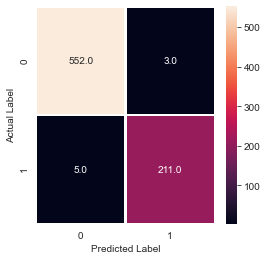

In [ ]:
## SVM report and analysis
from sklearn import metrics
svm_f1 = metrics.f1_score(Y_test,Y_pred ,average= "weighted")
svm_accuracy = metrics.accuracy_score(Y_test, Y_pred)
svm_cm = metrics.confusion_matrix(Y_test, Y_pred)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svm_f1))
print("Accuracy score: {}".format(svm_accuracy))
print("Confusion matrix: \n", svm_cm)

import seaborn as sns
plt.subplots(figsize=(4,4))
conf_matrix =  metrics.confusion_matrix(y_pred=Y_pred,y_true=Y_test)
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

##### Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)

C:\Users\panch\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_nb= pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_nb

,Y_test,Y_pred
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
766,1,1
767,0,0
768,0,0
769,0,0


In [ ]:
nb_accuracy=accuracy_score(Y_pred,Y_test)
nb_accuracy

0.9675745784695201

-----------------Decision Tree Report---------------
F1 score: 0.9669358198815337
Accuracy score: 0.9675745784695201
Confusion matrix: 
 [[555   0]
 [ 25 191]]


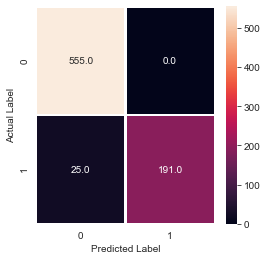

In [ ]:
## Naive Bayes report and analysis
from sklearn import metrics
nb_f1 = metrics.f1_score(Y_test,Y_pred ,average= "weighted")
nb_accuracy = metrics.accuracy_score(Y_test, Y_pred)
nb_cm = metrics.confusion_matrix(Y_test, Y_pred)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(nb_f1))
print("Accuracy score: {}".format(nb_accuracy))
print("Confusion matrix: \n", nb_cm)

import seaborn as sns
plt.subplots(figsize=(4,4))
conf_matrix =  metrics.confusion_matrix(y_pred=Y_pred,y_true=Y_test)
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

##### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_dt= pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_dt

,Y_test,Y_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
766,1,1
767,0,0
768,0,0
769,0,0


In [ ]:
dt_accuracy=accuracy_score(Y_pred,Y_test)
dt_accuracy

1.0

-----------------Decision Tree Report---------------
F1 score: 1.0
Accuracy score: 1.0
Confusion matrix: 
 [[555   0]
 [  0 216]]


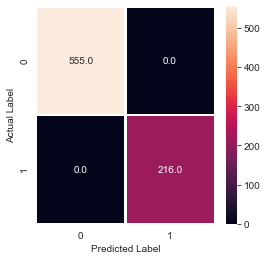

In [ ]:
##Decision Tree report and analysis
from sklearn import metrics
dt_f1 = metrics.f1_score(Y_test,Y_pred ,average= "weighted")
dt_accuracy = metrics.accuracy_score(Y_test, Y_pred)
dt_cm = metrics.confusion_matrix(Y_test, Y_pred)
print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(dt_f1))
print("Accuracy score: {}".format(dt_accuracy))
print("Confusion matrix: \n", dt_cm)

import seaborn as sns
plt.subplots(figsize=(4,4))
conf_matrix =  metrics.confusion_matrix(y_pred=Y_pred,y_true=Y_test)
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

##### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=5)

In [ ]:
rfc.fit(X_train, Y_train)

ipykernel_launcher:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(n_estimators=5)

In [ ]:
Y_pred = rfc.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
766,1,1
767,0,0
768,0,0
769,0,0


In [ ]:
randomforest_accuracy=accuracy_score(Y_pred,Y_test)
randomforest_accuracy

1.0

Acuracy with Random Forest is 1


-----------------Random Forest Report---------------
F1 score: 1.0
Accuracy score: 1.0
Confusion matrix: 
 [[555   0]
 [  0 216]]


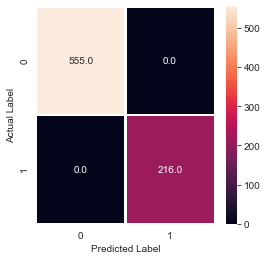

In [ ]:
##Random Forest report and analysis
from sklearn import metrics
random_forest_f1 = metrics.f1_score(Y_test,Y_pred ,average= "weighted")
random_forest_accuracy = metrics.accuracy_score(Y_test, Y_pred)
random_forest_cm = metrics.confusion_matrix(Y_test, Y_pred)
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))
print("Confusion matrix: \n", random_forest_cm)

import seaborn as sns
plt.subplots(figsize=(4,4))
conf_matrix =  metrics.confusion_matrix(y_pred=Y_pred,y_true=Y_test)
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#### Accuracy Plotting for classification models

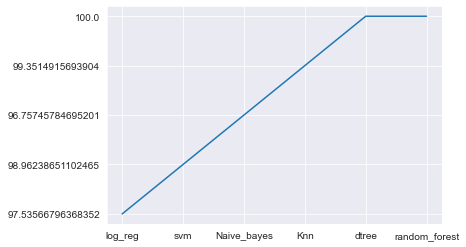

In [ ]:
import pandas as pd 
import numpy as np

objects = ('log_reg','svm','Naive_bayes','Knn','dtree','random_forest')
y_pos = np.arange(len(objects))

lr   = format(lr_accuracy*100)
svm  = format(svm_accuracy*100)
Nb   = format(nb_accuracy*100)
Knn  = format(knn_accuracy*100)
dt   = format(dt_accuracy*100)
rf   = format(randomforest_accuracy*100)

model_data = [lr,svm,Nb,Knn,dt,rf]

#position = [91,92,93,94,95,96,97,98,99,100]
plt.plot(y_pos,model_data, alpha=1.00)
plt.xticks(y_pos,objects)
plt.show()